In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta
import pymongo

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Other external scripts
import lst1_mongodb_example
import utils

client_tcu  = pymongo.MongoClient("localhost:27017")
client_caco = pymongo.MongoClient("localhost:27018")

#### TCU properties:

In [2]:
!python lst1_mongodb_example.py --list-available

---                                          ---
---         Available property names         ---
---                                          ---
  0 : AMC_Master_ActuatorErrorCode
  1 : AMC_Master_ActuatorHumidity
  2 : AMC_Master_ActuatorPosition
  3 : AMC_Master_ActuatorPositionDeviation
  4 : AMC_Master_ActuatorSignalStrength
  5 : AMC_Master_ActuatorTemperature
  6 : AMC_Master_ConfiguredZenithAngle
  7 : AMC_Master_ErrorCode
  8 : AMC_Master_FSM_state
  9 : AMC_Master_FSM_transition
 10 : AMC_Master_HeartbeatTimestamp
 11 : AMC_Master_SlaveInTransition
 12 : AMC_Master_SlaveStates
 13 : AMC_Master_SlavesConnected
 14 : AMC_Master__Enable_Heart_Beat
 15 : AMC_Master__Error_Heart_Beat
 16 : AMC_Master__Heart_Beat
 17 : AMC_Master__Heart_Beat_TimeOut
 18 : AMC_PSF_CCDPower
 19 : AMC_PSF_CCDTemperature
 20 : AMC_PSF_ConfiguredExposure
 21 : AMC_PSF_CooledDown
 22 : AMC_PSF_FSM_state
 23 : AMC_PSF_FSM_transition
 24 : AMC_PSF_GrowthCurve
 25 : AMC_PSF_HeartbeatTimestamp
 26 : AMC_PSF

#### CaCo databases and collections:

In [3]:
# client_caco = pymongo.MongoClient("localhost:27018")

# all_databases = np.sort(client_caco.list_database_names())

# print(f"--- {'':^40s} ---")
# print(f"--- {'Available CaCo databases and collections':^40s} ---")
# print(f"--- {'':^40s} ---")
# for database in all_databases:
#     print(f"\n--- {f'Database - {database}':^40s} ---")
    
#     all_collections = np.sort(client_caco[database].list_collection_names())
#     for i, collection in enumerate(all_collections):
#         print(f"{i:4d} : {collection}")

#### All properties from CaCo database:

In [4]:
# Selecting CaCo database
caco_db = client_caco.CACO

dict_caco_names = {}
all_collections = np.sort(caco_db.list_collection_names())
for coll_name in all_collections:
    coll = caco_db[coll_name]
    if coll not in ["STATE", "RUN_INFORMATION"] and "week" in coll_name:
    
        print(f"\n--- {f'Collection - {coll_name}':^40s} ---")
        names = coll.distinct("name")
        
        dict_caco_names[coll_name.replace("week", "min")] = names
        for i,n in enumerate(names):
            print(f"{i:4.0f} : {n}")


---          Collection - CBOX_week          ---
   0 : CBOX_DewPoint
   1 : CBOX_Error_InterCalibration_Mean
   2 : CBOX_FSM_state
   3 : CBOX_Humidity
   4 : CBOX_InterCalibration_Mean
   5 : CBOX_LaserStatus
   6 : CBOX_LaserTrigParameters1
   7 : CBOX_LaserTrigParameters2
   8 : CBOX_Pressure
   9 : CBOX_Temperature
  10 : CBOX_WheelPosition1
  11 : CBOX_WheelPosition2

---         Collection - CLUSCO_week         ---
   0 : backplane_error_flag
   1 : backplane_firmware
   2 : backplane_temperature
   3 : clusco_busy_state
   4 : clusco_hv_on
   5 : clusco_l0_hot
   6 : clusco_l0_rate_control
   7 : clusco_l0_rate_max
   8 : clusco_l1_rate_control
   9 : clusco_l1_rate_max
  10 : clusco_l1_rate_target
  11 : clusco_mean_dc
  12 : clusco_mean_dc_healthy
  13 : clusco_nb_hv_reduced
  14 : clusco_zenith
  15 : cluster_status
  16 : dragon_busy
  17 : dragon_drs_cascade_channels
  18 : dragon_drs_read_depth
  19 : dragon_drs_sampling_frequency
  20 : dragon_drs_trigger_selection
  21

   0 : TIB_Alarm_AlarmVector
   1 : TIB_BUSY_TIB_busy_time
   2 : TIB_ConnectionStatus
   3 : TIB_DACOptical_Neighbour5
   4 : TIB_Delays_Delay2
   5 : TIB_Delays_DelayLocal
   6 : TIB_Rates_BUSYRate
   7 : TIB_Rates_CalibrationRate
   8 : TIB_Rates_CameraRate
   9 : TIB_Rates_CollectedRate
  10 : TIB_Rates_In1Rate
  11 : TIB_Rates_In2Rate
  12 : TIB_Rates_In3Rate
  13 : TIB_Rates_In4Rate
  14 : TIB_Rates_LocalRate
  15 : TIB_Rates_PedestalRate
  16 : TIB_Rates_SoftrigRate
  17 : TIB_Rates_SpheRate
  18 : TIB_Rates_StereoRate
  19 : TIB_ReadState
  20 : TIB_TIB_TXclient_alive
  21 : TIB_Temperature
  22 : TIB_TriggerMode_ModeMask


# Parameters
* Search for the variable names in before produced lists and fill the names.
* If no variables to be input, fill with **`None`**
* Set start and stop time for the query

In [5]:
# IDs of the variables to be displayed
variable_1_caco = "ECC_Monitoring_Sensors_TemperatureSensors_TemperatureAverage"
variable_1_tcu  = "ECC_Monitoring_Sensors_TemperatureSensors_TemperatureSensor_"
variable_2_caco = "CBOX_Temperature"
variable_2_tcu  = None

# Time for the query
tstart = datetime.fromisoformat("2024-03-17-16:00:00")
tstop  = datetime.fromisoformat("2024-03-18-10:40:00")

#### Getting the DB entries

In [6]:
out_1_caco = utils.get_caco_entries(client_caco, variable_1_caco, dict_caco_names, tstart=tstart, tstop=tstop)
date_1_caco, value_1_caco = out_1_caco["time"], out_1_caco["value"]

out_2_caco = utils.get_caco_entries(client_caco, variable_2_caco, dict_caco_names, tstart=tstart, tstop=tstop)
date_2_caco, value_2_caco = out_2_caco["time"], out_2_caco["value"]

out_1_tcu = lst1_mongodb_example.get_entries(client_tcu, variable_1_tcu, astropy_time=False, tstart=tstart, tstop=tstop)
date_1_tcu, value_1_tcu = out_1_tcu["time"], out_1_tcu["value"]

out_2_tcu = lst1_mongodb_example.get_entries(client_tcu, variable_2_tcu, astropy_time=False, tstart=tstart, tstop=tstop)
date_2_tcu, value_2_tcu = out_2_tcu["time"], out_2_tcu["value"]

# Ceck if something is empty
for var, vals, name in zip([variable_1_caco, variable_1_tcu, variable_2_caco, variable_2_tcu], [value_1_caco, value_1_tcu, value_2_caco, value_2_tcu], ["CaCo", "TCU ", "CaCo", "TCU "]):
    if var != None:
        print(f"For {name} {var:50} : {len(vals):5} entries found")

# Some variables are in bunches, so for this case, only taking first element
if len(value_1_tcu) > 0:
    if len(value_1_tcu[0]) > 1:
        print(f"\nFor TCU, {variable_1_tcu} is in buches of {len(value_1_tcu[0])}, in this case taking first element.")
        value_1_tcu = np.array(value_1_tcu)[:,1]
if len(value_2_tcu) > 0:
    if len(value_2_tcu[0]) > 1:
        print(f"For TCU; {variable_2_tcu} is in buches of {len(value_2_tcu[0])}, in this case taking first element.")
        value_2_tcu = np.array(value_2_tcu)[:,1]
        
        
        
# Check if var1 is empty but var2 is filled
# In this case we fill the "1" inforation with "2" data
if (variable_1_tcu == None and variable_1_caco == None) and (variable_2_tcu != None or variable_2_caco != None):
    
    variable_1_caco, variable_2_caco = variable_2_caco, variable_1_caco
    variable_1_tcu, variable_2_tcu   = variable_2_tcu, variable_1_tcu
    out_1_caco, out_2_caco = out_2_caco, out_1_caco
    out_1_tcu, out_2_tcu   = out_2_tcu, out_1_tcu
    value_1_caco, value_2_caco = value_2_caco, value_1_caco
    value_1_tcu, value_2_tcu   = value_2_tcu, value_1_tcu
    date_1_caco, date_2_caco = date_2_caco, date_1_caco
    date_1_tcu, date_2_tcu   = date_2_tcu, date_1_tcu

For CaCo ECC_Monitoring_Sensors_TemperatureSensors_TemperatureAverage :  7367 entries found
For TCU  ECC_Monitoring_Sensors_TemperatureSensors_TemperatureSensor_ : 47279 entries found
For CaCo CBOX_Temperature                                   :  1158 entries found

For TCU, ECC_Monitoring_Sensors_TemperatureSensors_TemperatureSensor_ is in buches of 16, in this case taking first element.


#### Plotting

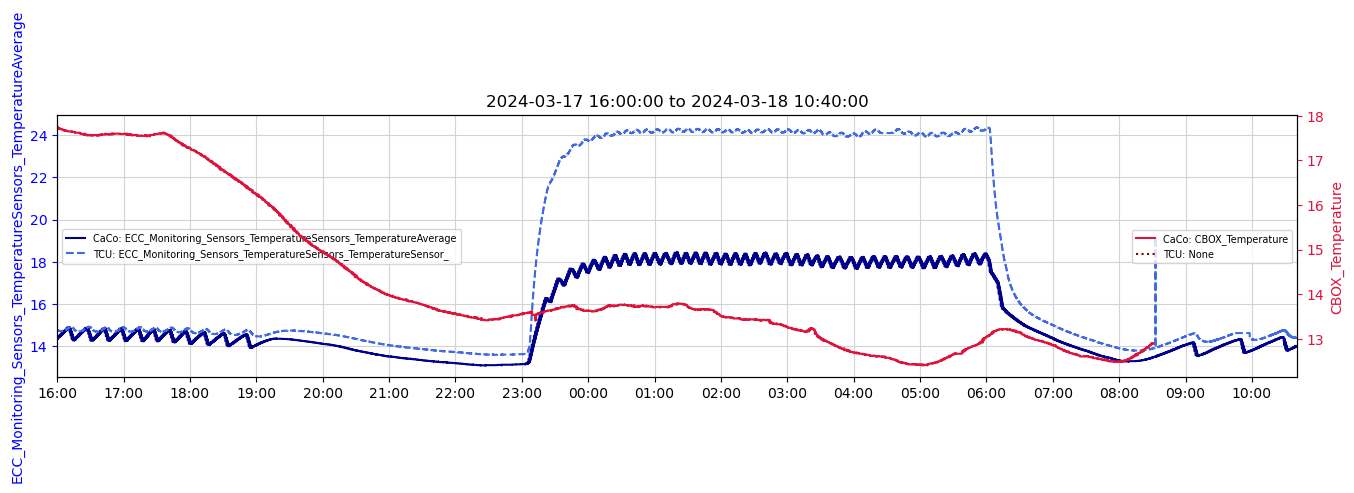

In [7]:
fig, ax = plt.subplots(figsize=(16,3.4))
if len(value_2_tcu) > 0 or len(value_2_caco) > 0:
    axt = ax.twinx()
    axt.set_ylabel(variable_2_tcu)
    axt.set_ylabel(variable_2_caco)

ax.plot(date_1_caco, value_1_caco, ds="steps-post", c="darkblue", lw=1.5,
        label=f"CaCo: {out_1_caco['name']}")
ax.plot(date_1_tcu, value_1_tcu, ds="steps-post", c="royalblue", ls="--", lw=1.5,
        label=f"TCU: {out_1_tcu['name']}")

axt.plot(date_2_caco, value_2_caco, ds="steps-post", c="crimson", lw=1.5,
         label=f"CaCo: {out_2_caco['name']}")
axt.plot(date_2_tcu, value_2_tcu, ds="steps-post", c="maroon", ls=":", lw=1.5,
         label=f"TCU: {out_2_tcu['name']}")
    

ax.set_ylabel(variable_1_tcu)
ax.set_ylabel(variable_1_caco)
ax.legend(loc=6, prop={'size': 7})
if len(value_2_tcu) > 0 or len(value_2_caco) > 0:
    axt.legend(loc=7, prop={'size': 7})
ax.grid(color="lightgray")

# Plotting limits
lim_m, lim_M = min(min(date_1_caco), min(date_1_tcu)), max(max(date_1_caco), max(date_1_tcu))

timespan = lim_M - lim_m
ax.set_xlim(lim_m, lim_M)
ax.set_title(f"{tstart} to {tstop}")
utils.format_time_ticks_axes(ax, lim_m, lim_M, timespan)

ax.yaxis.label.set_color("b")
ax.tick_params(axis='y', colors="b")
axt.yaxis.label.set_color("crimson")
axt.tick_params(axis='y', colors="crimson")

# plt.savefig(f"output.png", dpi=300, bbox_inches='tight')
plt.show()